# Deep Learning With Tensorflow


This notebook will implement the architecture of an artificial neural network using the TensorFlow framework. I will utilize the iconic MNIST dataset to deploy the model. The MNIST dataset contains 28x28 pixel images of handwritten digits from 0 - 9. This is a multiclass classification problem with 10 classes.

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Get the GPU up and running !

In [2]:
import tensorflow as tf
# The GPU is up and running !
GPU = tf.config.experimental.list_physical_devices('GPU')
print("Graphics Processing Unit: ", len(GPU))

Graphics Processing Unit:  1


We need to pay close attention to the datastructure of our problem set. This is arguably the most important aspect of developing a predictive model. Be mindful of the dimensions/shapes of the input and output layers.

In [8]:
def info(x):
    print("The datatype of rach element: ", X_train.dtype)
    print("The number of dimensions ", X_train.ndim)
    print("The shape of tensor: ", tf.shape(X_train))
    print("Elements along the 0 axis :", X_train.shape[0])
    print("Elements along the last axis: ", X_train.shape[-1])
    print("The total number of elements in tensor: ", tf.size(X_train))
    print("The total number of elements in tensor: ", tf.size(X_train).numpy()) 

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Normalizing features is a standard preprocessing task. This allows gradient descent to converge faster.

In [20]:
# Rescaling Images
X_train  = X_train / 255.0

In [17]:
info(X_train)

The datatype of rach element:  float64
The number of dimensions  3
The shape of tensor:  tf.Tensor([60000    28    28], shape=(3,), dtype=int32)
Elements along the 0 axis : 60000
Elements along the last axis:  28
The total number of elements in tensor:  tf.Tensor(47040000, shape=(), dtype=int32)
The total number of elements in tensor:  47040000


# Modelling

There are three different methods of deploying a nueral network with Tensorflow. These are the sequential, functional and subclass API's. Within the Sequential API, we can either create the neural network by utilizing 'model.add' or we can pass the entire architecture in a list.

The architecture of a neural network consists of an input layer, hidden layers and an output layer. The input features are flattened (28 x 28 into 784) into a single vector and are passed onto the subsequent hidden layers where the dot product of the weights and the input features takes place. The output is then passed through an activation function (relu in our case) and the output of this first hidden layer is then passed onto the second hidden layer. This process is repeated until the data is passed onto the output layer where an activation function like sigmoid or softmax is deployed for classification problems. These activation functions return probabilities for each class.   

In [21]:
# Sequential API method 1
model = tf.keras.Sequential() # instantiate sequential API
model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="input_layer")) # flatten the 28x28 image
model.add(tf.keras.layers.Dense(32, activation = "relu", name = "layer_1")) # first hidden layer with 32 neurons
model.add(tf.keras.layers.Dense(64, activation= "relu", name= "layer_2")) # second hidden layer with 64 neurons
model.add(tf.keras.layers.Dense(128, activation= "relu", name="layer_3")) # third hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(10, activation= "softmax", name="output_layer")) # final output layer with 10 neurons one for each number
model.summary() 


# Sequential API method 2
model = tf.keras.Sequential([
                     tf.keras.layers.Flatten(input_shape=(28,28)),
                     tf.keras.layers.Dense(32, activation="relu"),        
                     tf.keras.layers.Dense(64, activation="relu"),
                     tf.keras.layers.Dense(128, activation="relu"),        
                     tf.keras.layers.Dense(10, activation="softmax"),])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
layer_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
layer_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


Now we will compile the model. At this stage we select the optimization function, learning rate and loss function. The optimizer takes the derivates of the weights and biases with respect to the loss function in order to find the parameters that minimize the loss. All optimizers carry out the same objective, however there are some differences as to how each variant carries out this process. The differences entail tradeoffs in speed and resources. 

The loss function is typically categorical crossentropy or sparse categorical crossentropy. The former expects the features to be one-hot-encoded. We have used the latter here because the output function contains 10 features that are not one hot encoded.

We can use all available evaluation metrics to gauge model performance. Typically for a balanced dataset, accuracy will make do, however its still good to take a look at other performace specific metrics for evaluation.

- Optimizer : Adam, SGD, RMSprop, minibatchSGD
- loss: categorical_crossentropy or sparse categorical crossentropy
- metrics: accuracy, auc/roc, F1, precision, recall etc

In [22]:
# Compilation stage
model.compile(Adam(learning_rate=  0.01), 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy'])

With the model architecture all set up and compiled, we are ready to train the model. The model.fit method takes in the training input and labeled outout, creates a validation set for testing, a batch size, and number of epochs. 

In [25]:
history = model.fit(X_train,
          y_train,
          validation_split= 0.2,
          batch_size = 20,
          epochs =10)

Epoch 1/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4488 - accuracy: 0.8460 - val_loss: 0.4545 - val_accuracy: 0.8397
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4450 - accuracy: 0.8471 - val_loss: 0.4895 - val_accuracy: 0.8231
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4508 - accuracy: 0.8443 - val_loss: 0.4872 - val_accuracy: 0.8422
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4267 - accuracy: 0.8511 - val_loss: 0.4648 - val_accuracy: 0.8457
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4478 - accuracy: 0.8470 - val_loss: 0.4874 - val_accuracy: 0.8393
Epoch 6/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4412 - accuracy: 0.8489 - val_loss: 0.4740 - val_accuracy: 0.8457
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4271 - accuracy: 0.8522 - val_loss: 0.5058 - val_accuracy:

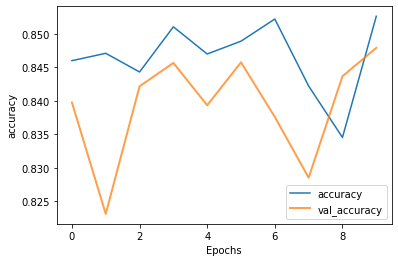

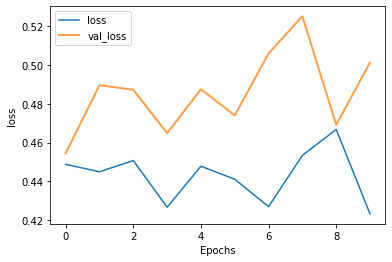

In [26]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], linewidth = 2, alpha = 0.75)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")